In [750]:
import pandas as pd
import numpy as np
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import warnings
from matplotlib import font_manager as fm

In [751]:
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', None)
warnings.filterwarnings("ignore")
melhouse = pd.read_csv('melb_data.csv')

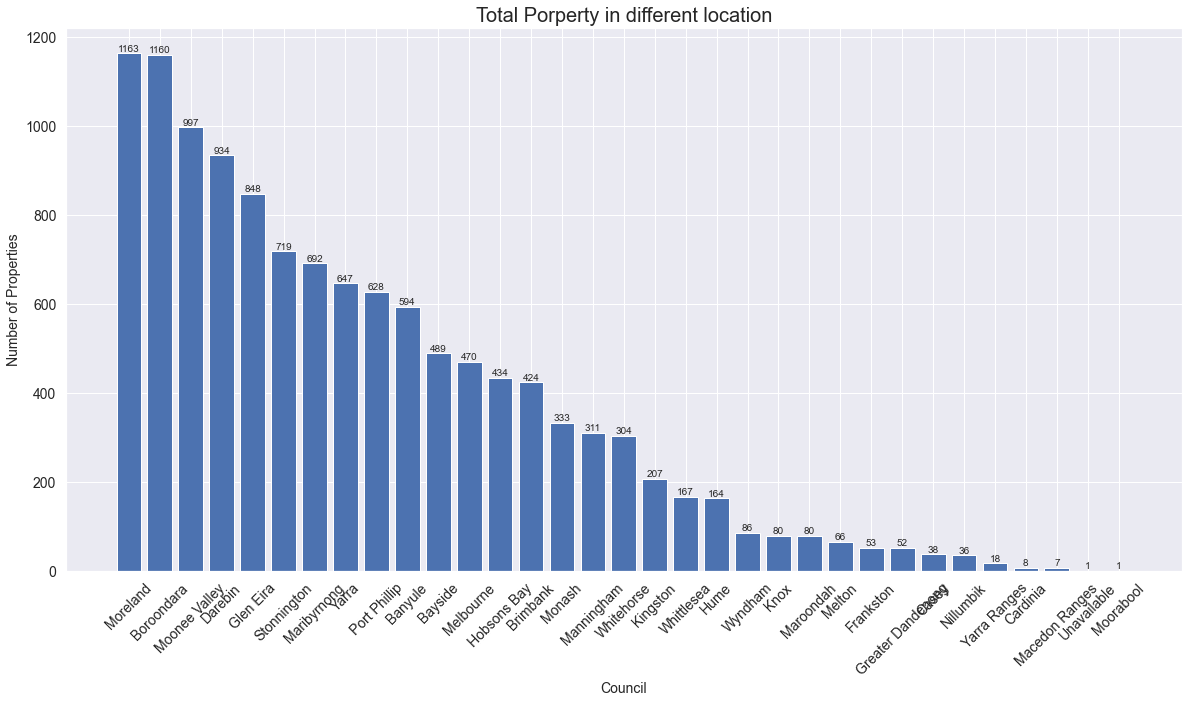

In [752]:
count_by_location = melhouse['CouncilArea'].value_counts()
plt.figure(figsize=(20,10))
plt.bar(df_count_by_location.index,df_count_by_location.values,color='b')
plt.title('Total Porperty in different location', fontsize=20)
plt.xlabel('Council', fontsize=14)
plt.ylabel('Number of Properties', fontsize=14)
plt.tick_params(labelsize=14)
plt.xticks(rotation=45)
for a,b in zip(count_by_location.index, count_by_location.values):
    plt.text(a, b+5, b, fontsize=10, ha='center')
plt.show()

In [753]:
melhouse_house = melhouse.drop(melhouse[melhouse['Type']!='h'].index)
house = melhouse_house[['CouncilArea','Price']]
house = house.groupby('CouncilArea')['Price'].agg(['mean']).apply(lambda x:x/1000000).round(2).reset_index()
house = house.sort_values(by = ['mean'])
house.head()

,CouncilArea,mean
22,Moorabool,0.28
19,Melton,0.50
30,Wyndham,0.54
4,Cardinia,0.58
11,Hume,0.58


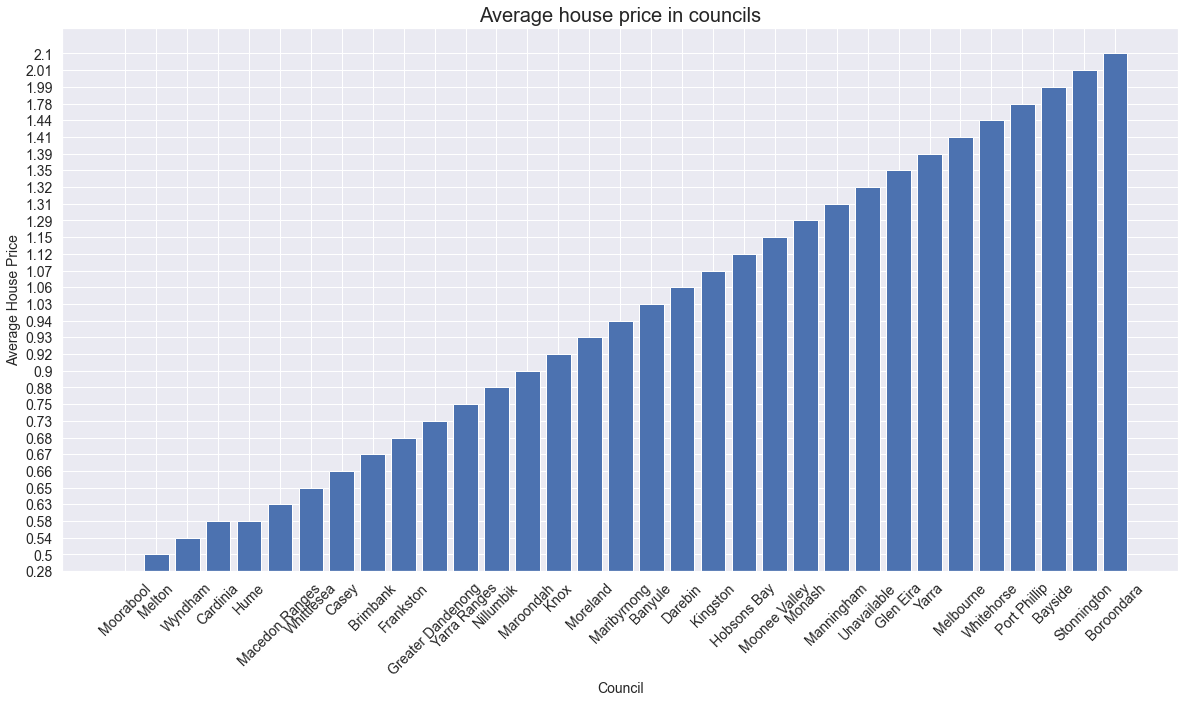

In [754]:
plt.figure(figsize=(20,10))
plt.bar(house['CouncilArea'].astype(str),house['mean'].astype(str),color='b')
plt.title('Average house price in councils', fontsize=20)
plt.xlabel('Council', fontsize=14)
plt.ylabel('Average House Price', fontsize=14)
plt.tick_params(labelsize=14)
plt.xticks(rotation=45)
plt.show()

In [755]:
melhouse_unit = melhouse.drop(melhouse[melhouse['Type']!='u'].index)
unit = melhouse_unit[['CouncilArea','Price']]
unit = unit.groupby('CouncilArea')['Price'].agg(['mean']).apply(lambda x:x/1000000).round(2).reset_index()
unit = unit.sort_values(by = ['mean'])
unit.head()

,CouncilArea,mean
10,Hume,0.36
26,Wyndham,0.38
14,Maribyrnong,0.41
6,Frankston,0.42
25,Whittlesea,0.43


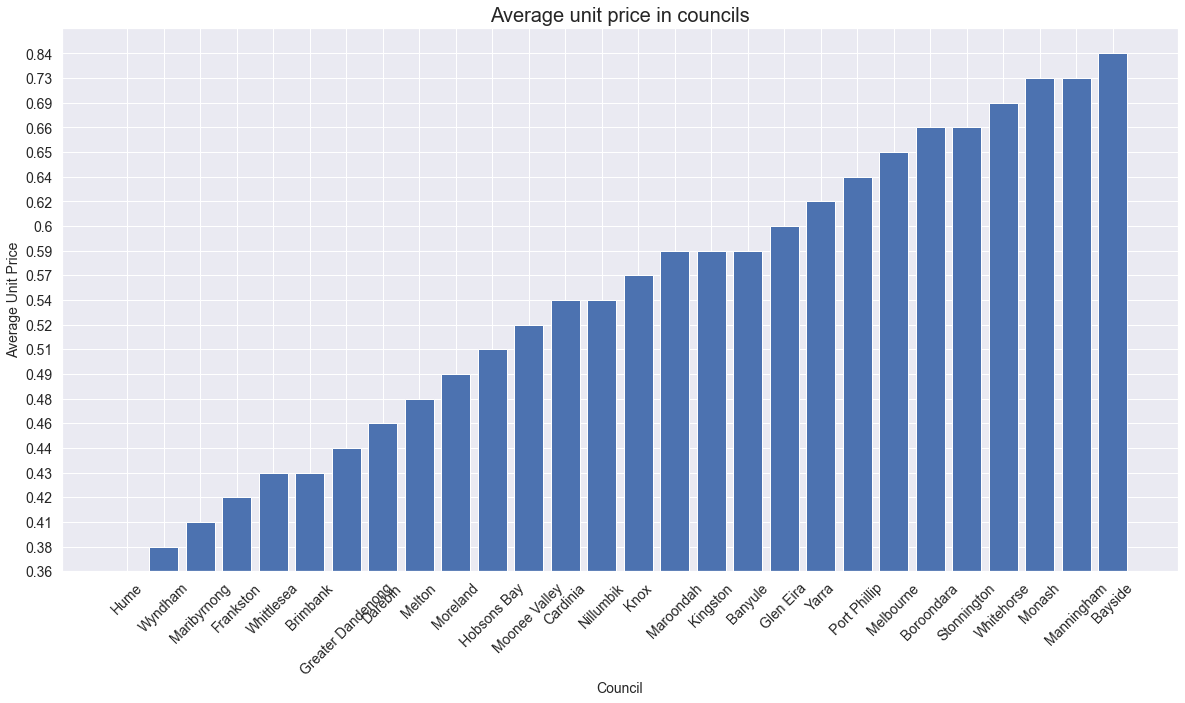

In [756]:
plt.figure(figsize=(20,10))
plt.bar(unit['CouncilArea'].astype(str),unit['mean'].astype(str),color='b')
plt.title('Average unit price in councils', fontsize=20)
plt.xlabel('Council', fontsize=14)
plt.ylabel('Average Unit Price', fontsize=14)
plt.tick_params(labelsize=14)
plt.xticks(rotation=45)
plt.show()

In [757]:
melhouse_townhouse = melhouse.drop(melhouse[melhouse['Type']!='t'].index)
townhouse = melhouse_townhouse[['CouncilArea','Price']]
townhouse = townhouse.groupby('CouncilArea')['Price'].agg(['mean']).apply(lambda x:x/1000000).round(2).reset_index()
townhouse = townhouse.sort_values(by = ['mean'])
townhouse.head()

,CouncilArea,mean
25,Wyndham,0.38
5,Frankston,0.39
16,Melton,0.40
9,Hume,0.41
24,Whittlesea,0.47


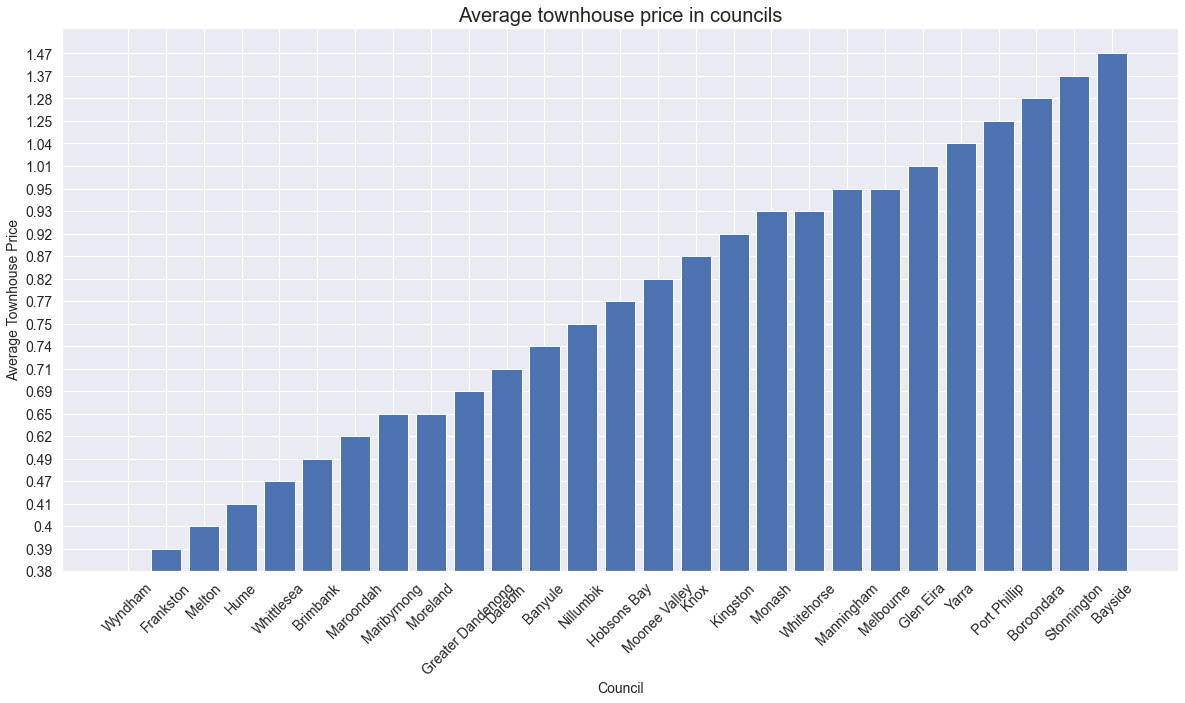

In [758]:
plt.figure(figsize=(20,10))
plt.bar(townhouse['CouncilArea'].astype(str),townhouse['mean'].astype(str),color='b')
plt.title('Average townhouse price in councils', fontsize=20)
plt.xlabel('Council', fontsize=14)
plt.ylabel('Average Townhouse Price', fontsize=14)
plt.tick_params(labelsize=14)
plt.xticks(rotation=45)
plt.show()

In [759]:
house_council = melhouse_house[['CouncilArea','Type']]
house_council = house_council.groupby('CouncilArea').count().reset_index()
house_council.loc[house_council.Type<100,'CouncilArea'] = 'Others'
house_council = house_council.groupby('CouncilArea')['Type'].agg(['sum']).reset_index()
house_council = house_council.sort_values(by = ['sum'], ascending=False)
house_council.head()

,CouncilArea,sum
14,Moreland,842
2,Boroondara,756
13,Moonee Valley,703
4,Darebin,689
10,Maribyrnong,486


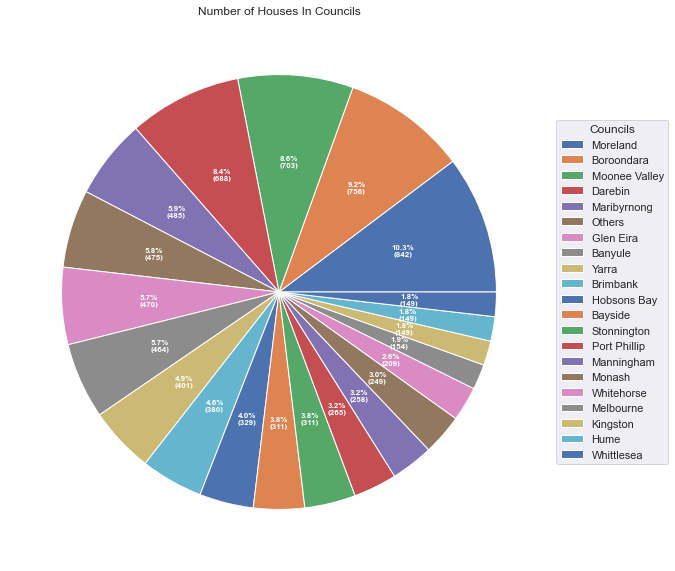

In [760]:
def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}%\n({:d})".format(pct, absolute)

fig, ax = plt.subplots(figsize=(50, 10), subplot_kw=dict(aspect="equal"))
wedges, texts, autotexts = ax.pie(house_council['sum'], autopct=lambda pct: func(pct, house_council['sum']), textprops=dict(color="w"))
ax.legend(wedges, house_council['CouncilArea'],title="Councils",loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
plt.setp(autotexts, size=8, weight="bold")
ax.set_title("Number of Houses In Councils")
plt.show()

In [761]:
date_price = melhouse[['Date','Price']]
date_price[['Year','Month','Day']] = date_price['Date'].str.split('/', expand = True)[[2,1,0]]
date_price['Month_Year'] = date_price['Date'].str.split('/', n=1, expand = True)[1]
date_price = date_price.sort_values(by = ['Year','Month','Day'])
date_price.head()

,Date,Price,Year,Month,Day,Month_Year
6183,28/01/2016,813000.0,2016,01,28,01/2016
6184,28/01/2016,1205000.0,2016,01,28,01/2016
1,4/02/2016,1035000.0,2016,02,4,02/2016
143,4/02/2016,720000.0,2016,02,4,02/2016
702,4/02/2016,1222500.0,2016,02,4,02/2016


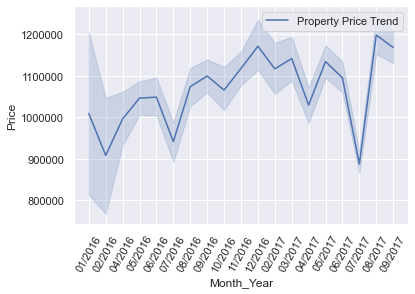

In [762]:
fig, ax = plt.subplots()
ax.get_yaxis().get_major_formatter().set_scientific(False)
sns.lineplot(x = date_price['Month_Year'],y = date_price['Price'], label = 'Property Price Trend')
for tick in ax.get_xticklabels():
    tick.set_rotation(60)

<AxesSubplot:title={'center':'Townhouse Price in different location'}, xlabel='CouncilArea', ylabel='Price'>

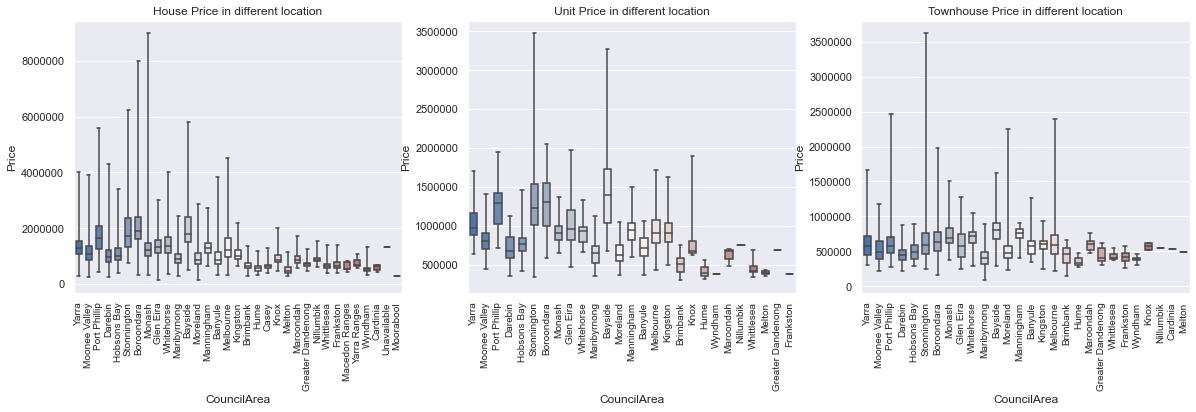

In [763]:
fig, axs = plt.subplots(nrows=1, ncols=3,figsize=(20, 5))
ax0 = axs[0]
ax0.set_xticklabels(house['CouncilArea'],rotation = 90,fontsize = 'small')
ax0.set_title('House Price in different location')
ax0.get_yaxis().get_major_formatter().set_scientific(False)
ax1 = axs[1]
ax1.set_xticklabels(house['CouncilArea'],rotation = 90,fontsize = 'small')
ax1.get_yaxis().get_major_formatter().set_scientific(False)
ax1.set_title('Unit Price in different location')
ax2 = axs[2]
ax2.set_xticklabels(house['CouncilArea'],rotation = 90,fontsize = 'small')
ax2.get_yaxis().get_major_formatter().set_scientific(False)
ax2.set_title('Townhouse Price in different location')
sns.boxplot(x="CouncilArea", y="Price", data=melhouse_house, whis=[0, 100], width=.6, palette="vlag", ax = ax0)
sns.boxplot(x="CouncilArea", y="Price", data=melhouse_townhouse, whis=[0, 100], width=.6, palette="vlag",ax = ax1)
sns.boxplot(x="CouncilArea", y="Price", data=melhouse_unit, whis=[0, 100], width=.6, palette="vlag", ax = ax2)

<AxesSubplot:xlabel='CouncilArea', ylabel='mean'>

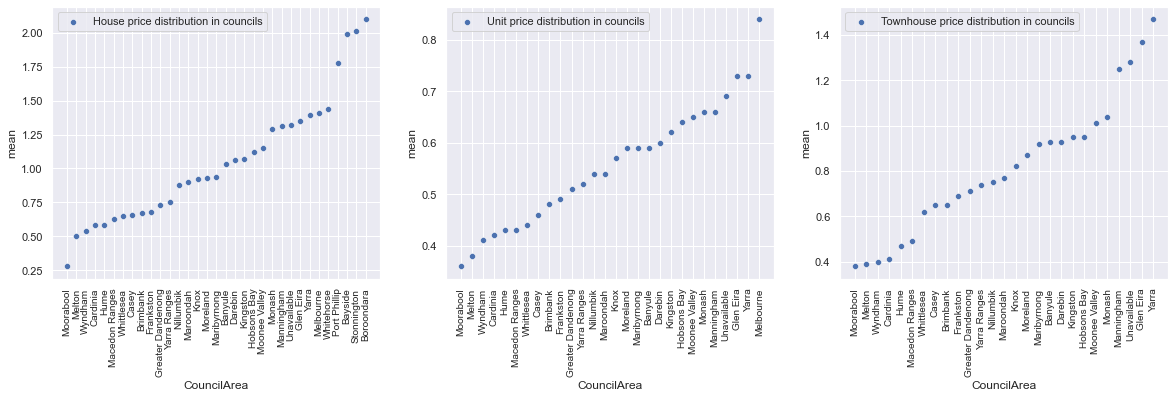

In [764]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(20, 5))
ax0 = axs[0]
ax0.set_xticklabels(house['CouncilArea'],rotation = 90,fontsize = 'small')
ax1 = axs[1]
ax1.set_xticklabels(house['CouncilArea'],rotation = 90,fontsize = 'small')
ax2 = axs[2]
ax2.set_xticklabels(house['CouncilArea'],rotation = 90,fontsize = 'small')
sns.scatterplot(x = house['CouncilArea'],y = house['mean'], label = 'House price distribution in councils',ax = ax0)
sns.scatterplot(x = unit['CouncilArea'],y = unit['mean'], label = 'Unit price distribution in councils',ax = ax1)
sns.scatterplot(x = townhouse['CouncilArea'],y = townhouse['mean'], label = 'Townhouse price distribution in councils',ax = ax2)